# Classification challenge


## Libraries


In [102]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data


In [103]:
# URL du dépôt GitHub
repo_url = 'https://github.com/JorisCaudard/M2_Data_Challenge.git'
repo_name = 'M2-Data_challenge'

In [104]:
DATA_FOLDER = "../Data/Classification"

TRAIN_FILE_NAME = "train.csv"
TEST_FILE_NAME = "test.csv"
NAIVE_SUBMISSION_FILE_NAME = "naive_submission.csv"
SUBMISSION_FILE_NAME = "submission.csv"

In [105]:
dfTrain = pd.read_csv(os.path.join(DATA_FOLDER, TRAIN_FILE_NAME), index_col=[0])
dfTest = pd.read_csv(os.path.join(DATA_FOLDER, TEST_FILE_NAME), index_col=[0])
dfSubmission = pd.read_csv(os.path.join(DATA_FOLDER, NAIVE_SUBMISSION_FILE_NAME), index_col=[0])

## Data Exploration


### Data Viz


In [106]:
dfTrain.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2909,28,18,182,58,1350,210,197,117,2160,...,0,0,0,0,0,0,0,0,0,2
1,2757,334,30,212,83,1384,137,184,177,1570,...,0,0,0,0,0,0,0,0,0,2
2,3283,248,4,150,15,5601,211,243,170,892,...,0,0,0,0,0,0,1,0,0,1
3,3019,330,14,541,-101,1811,186,222,175,2154,...,0,0,0,0,0,0,0,0,0,2
4,3039,340,20,474,74,3407,175,207,169,1879,...,0,0,0,0,0,0,0,1,0,1


In [107]:
dfTrain.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2959.215150,155.551260,14.122850,269.605630,46.821590,2350.361130,212.103800,223.348670,142.585660,1976.436530,...,0.090250,0.079220,0.002800,0.003080,0.000200,0.000570,0.027890,0.024050,0.015440,2.054180
std,280.832825,111.759698,7.507368,212.770595,58.689319,1560.499103,26.841126,19.756411,38.459542,1324.925172,...,0.286541,0.270083,0.052841,0.055412,0.014141,0.023868,0.164658,0.153205,0.123295,1.398794
min,1860.000000,0.000000,0.000000,0.000000,-161.000000,0.000000,0.000000,42.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,59.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1020.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1992.000000,218.000000,226.000000,143.000000,1704.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3331.250000,231.000000,237.000000,169.000000,2549.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,62.000000,1383.000000,598.000000,7078.000000,254.000000,254.000000,254.000000,7126.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [108]:
dfTest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
row_ID,,,,,,,,,,,,,,,,,,,,,
0,2767,66,17,210,18,1190,234,204,96,2251,...,1,0,0,0,0,0,0,0,0,0
1,2724,160,19,60,4,1350,236,240,127,2514,...,0,0,0,0,0,0,0,0,0,0
2,2360,65,7,127,21,1377,227,226,134,339,...,0,0,0,0,0,0,0,0,0,0
3,2995,45,4,285,30,5125,221,231,146,5706,...,0,0,0,0,0,0,0,0,0,0
4,2400,106,27,150,63,342,253,196,51,811,...,0,0,0,0,0,0,0,0,0,0


### Confusion Matrix


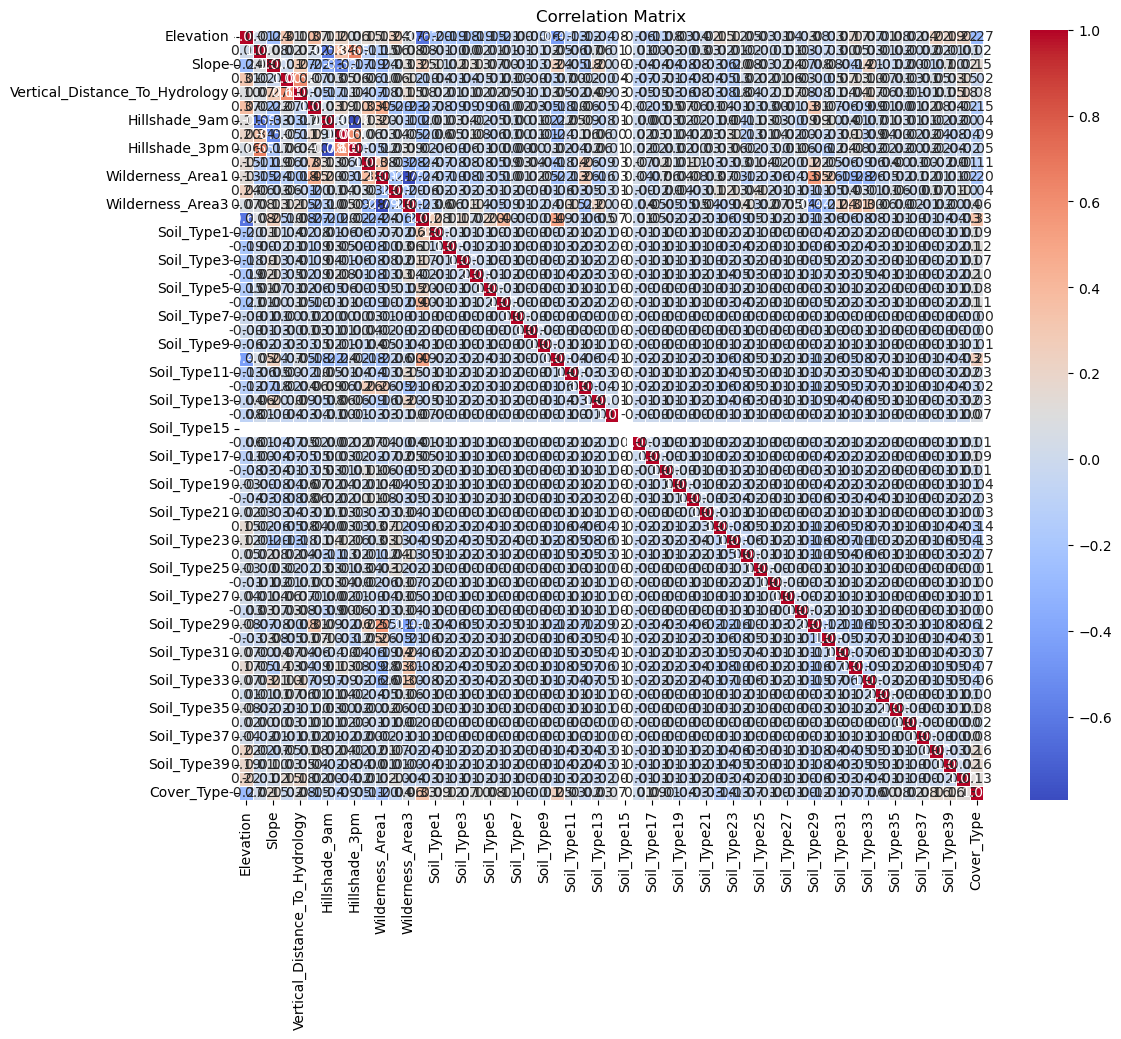

In [109]:
# Dropping non-numeric columns
dfTrain_numeric = dfTrain.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = dfTrain_numeric.corr()

# Plotting the correlation matrix using a Seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [110]:
corr_matrix['Cover_Type'].sort_values(key= lambda x: abs(x), ascending=False)

Cover_Type                            1.000000
Wilderness_Area4                      0.325169
Elevation                            -0.267913
Soil_Type10                           0.245397
Wilderness_Area1                     -0.203771
Soil_Type38                           0.159382
Soil_Type39                           0.158502
Horizontal_Distance_To_Roadways      -0.152771
Slope                                 0.148695
Soil_Type22                          -0.140981
Soil_Type23                          -0.133639
Soil_Type40                           0.125148
Soil_Type29                          -0.124785
Soil_Type2                            0.119987
Horizontal_Distance_To_Fire_Points   -0.108683
Soil_Type6                            0.107704
Soil_Type4                            0.098083
Hillshade_Noon                       -0.094558
Soil_Type17                           0.089580
Soil_Type1                            0.088764
Soil_Type37                           0.084440
Vertical_Dist

### Various plots


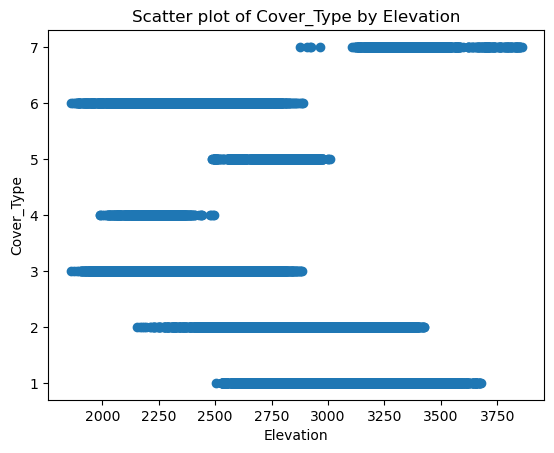

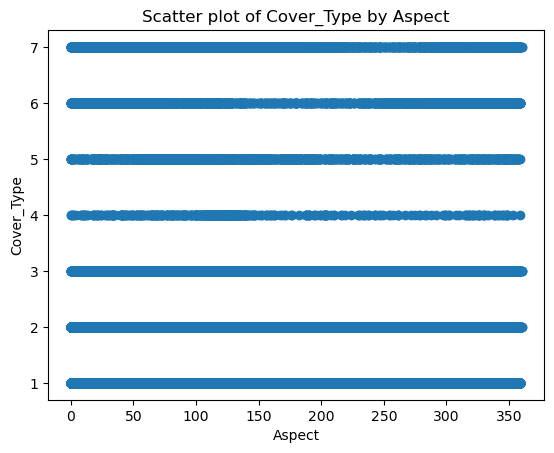

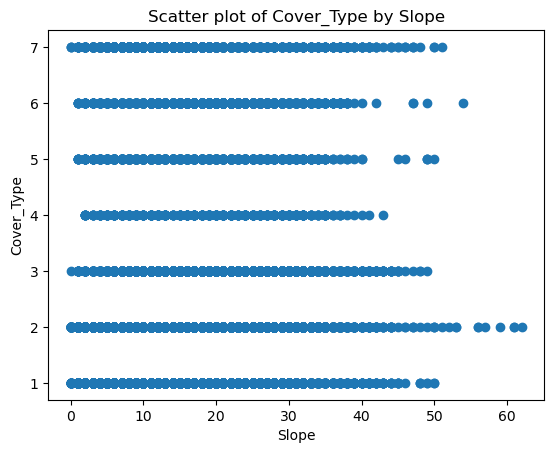

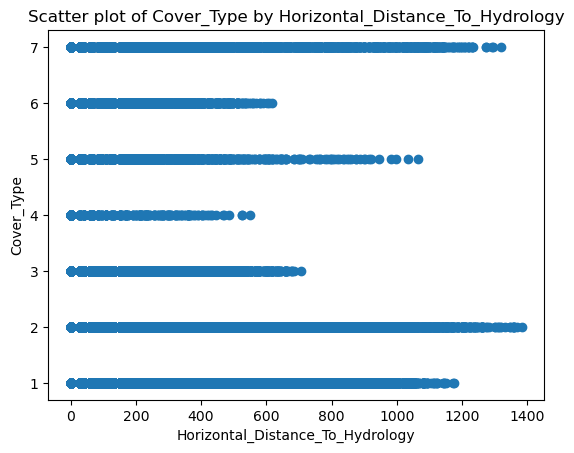

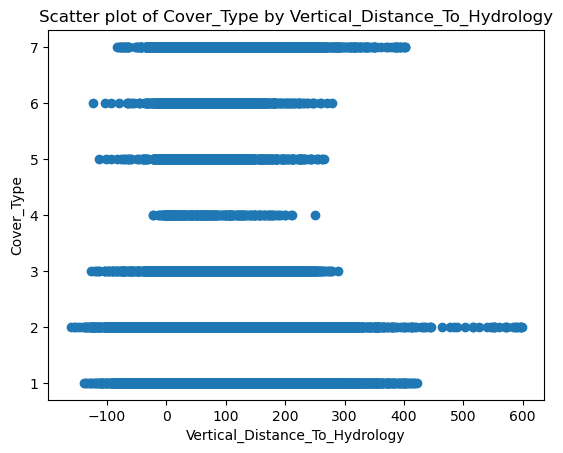

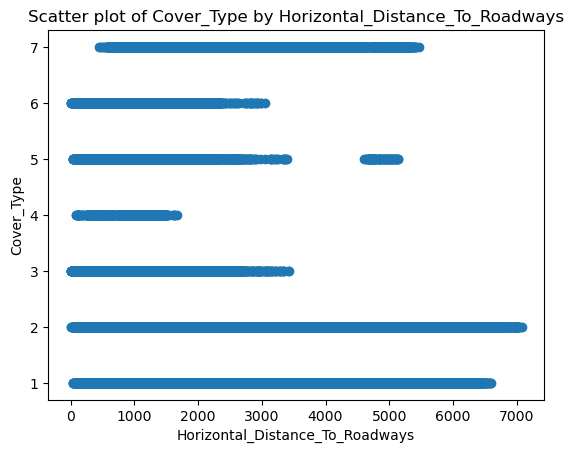

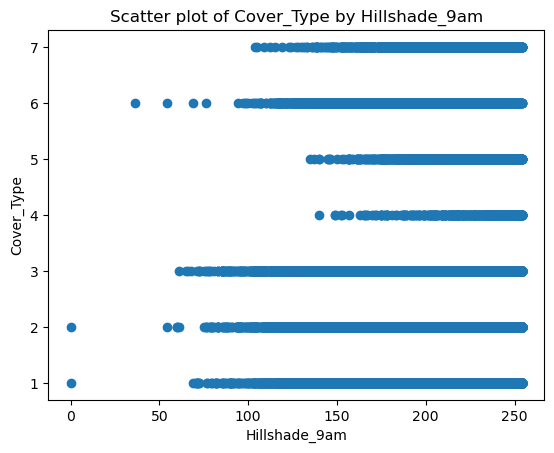

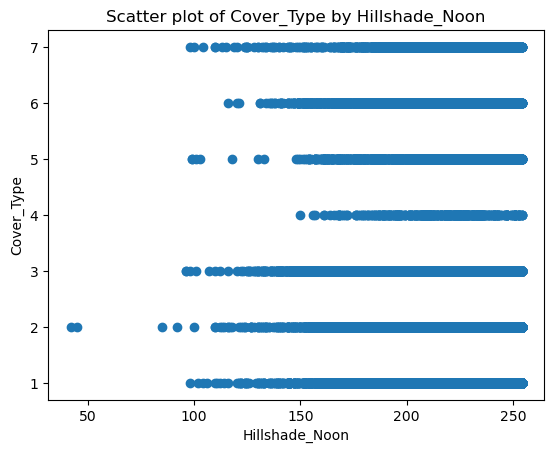

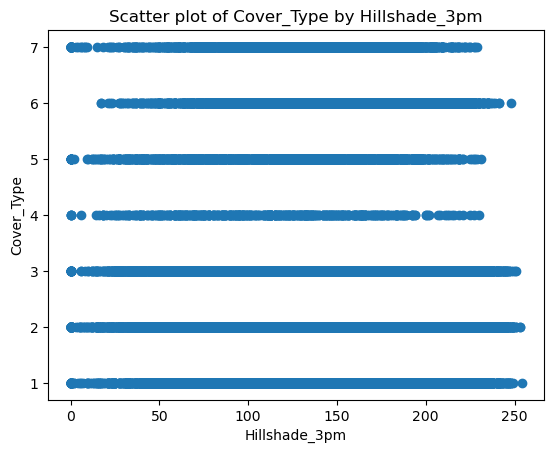

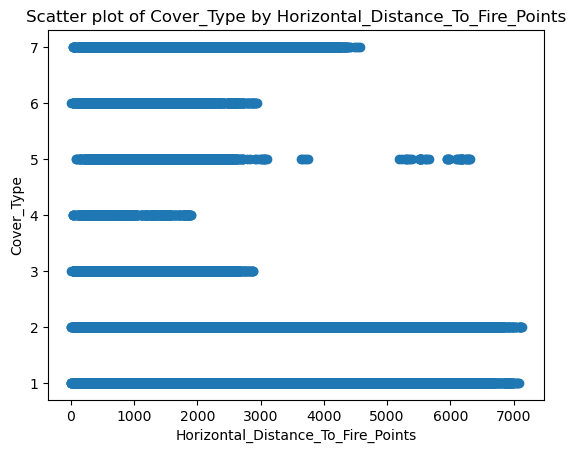

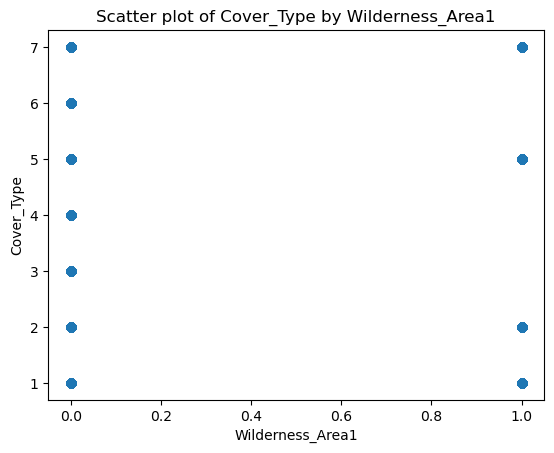

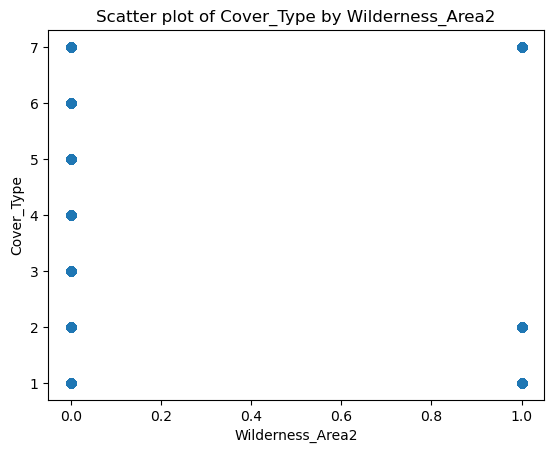

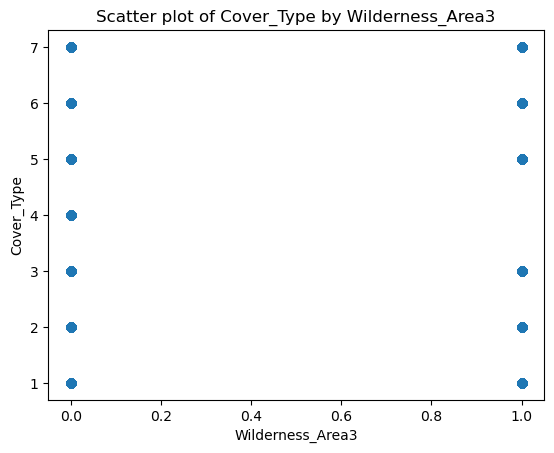

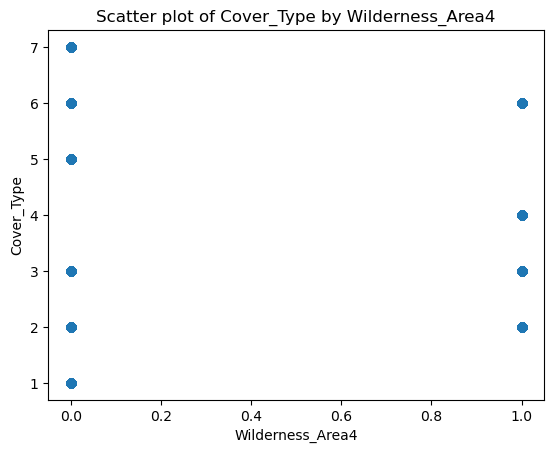

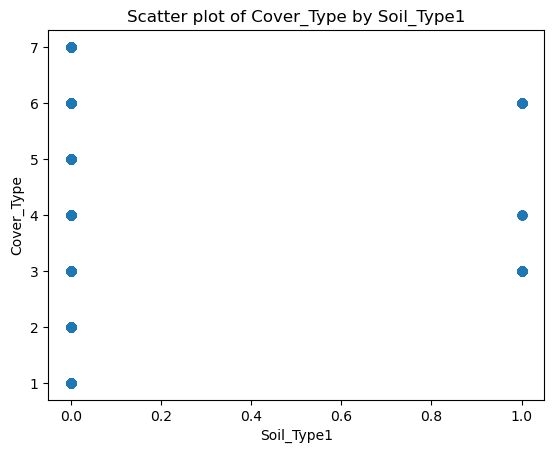

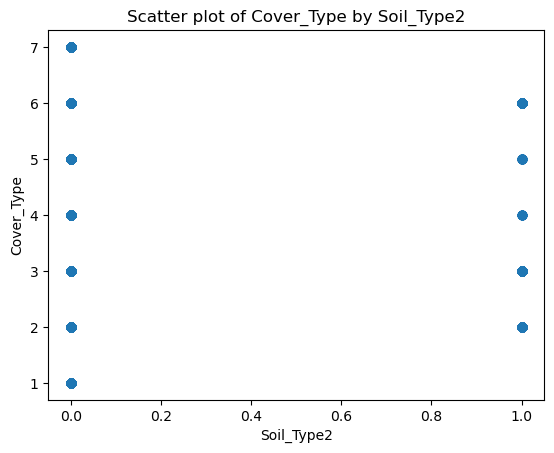

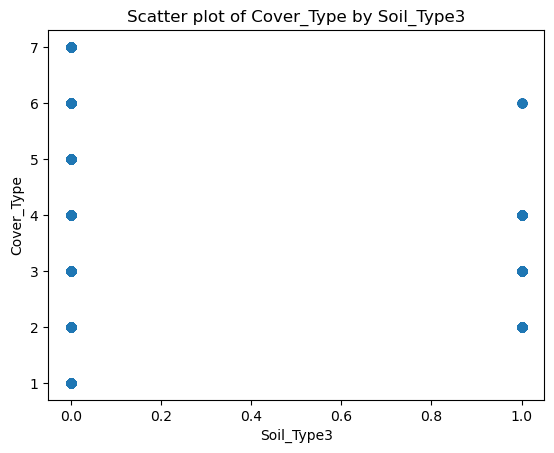

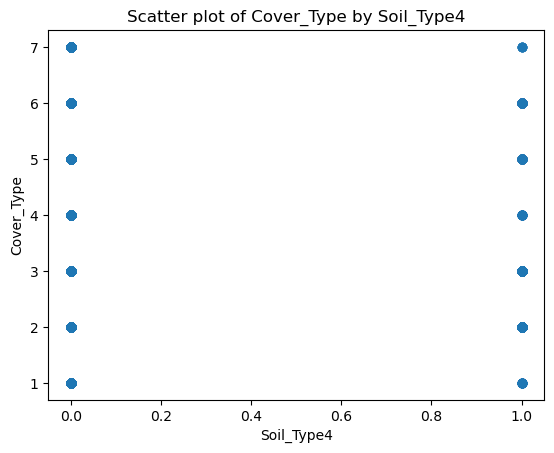

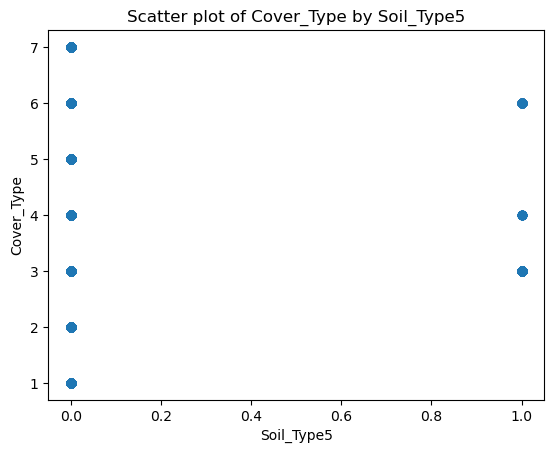

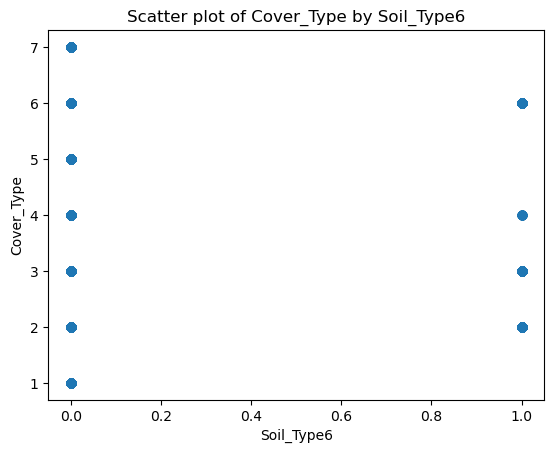

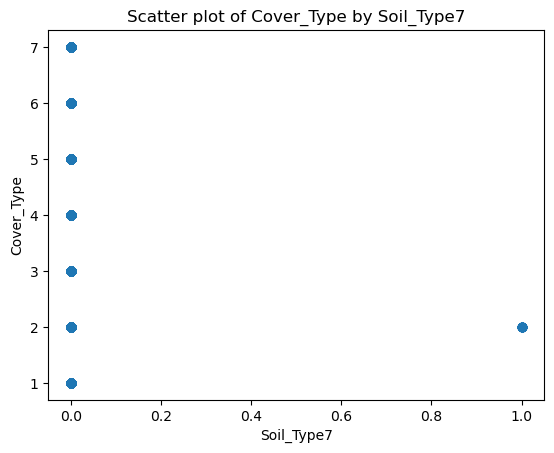

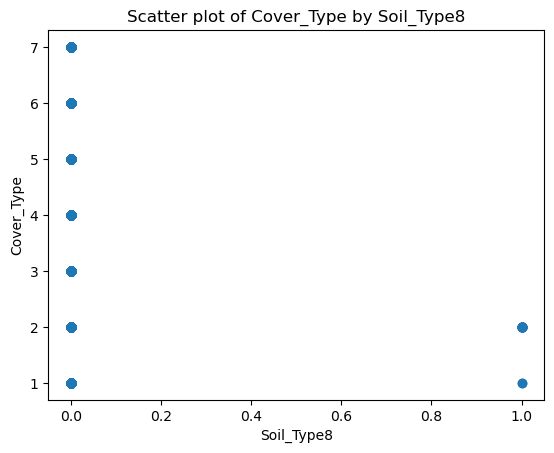

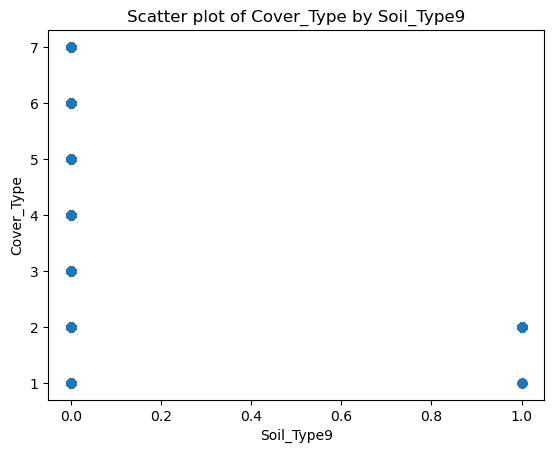

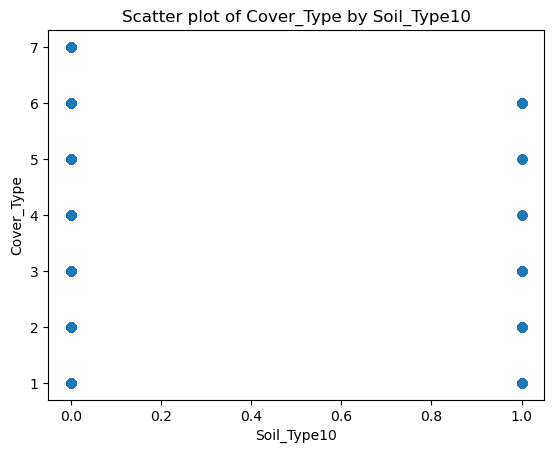

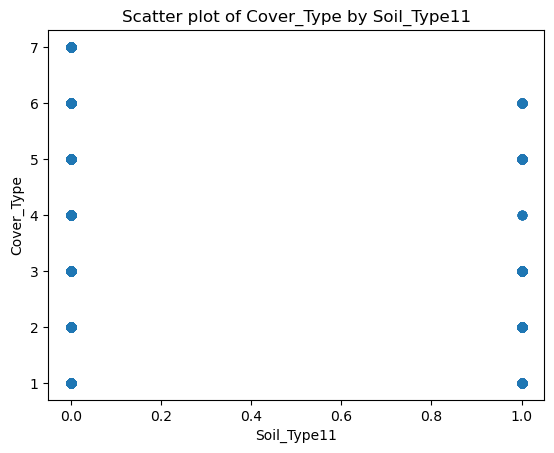

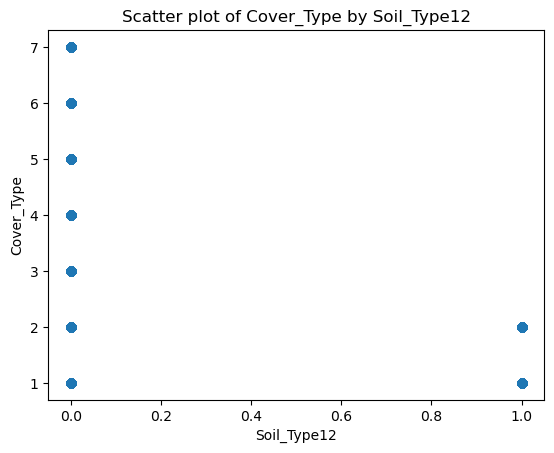

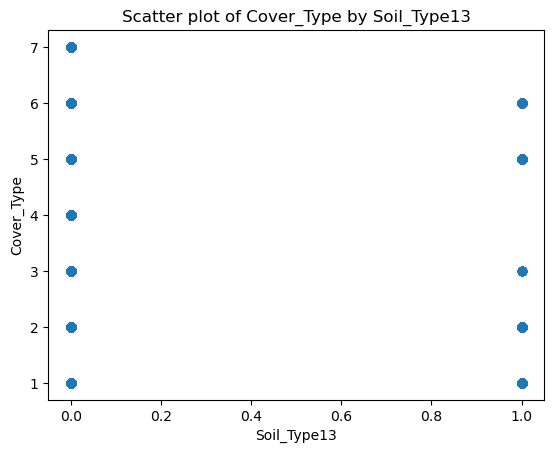

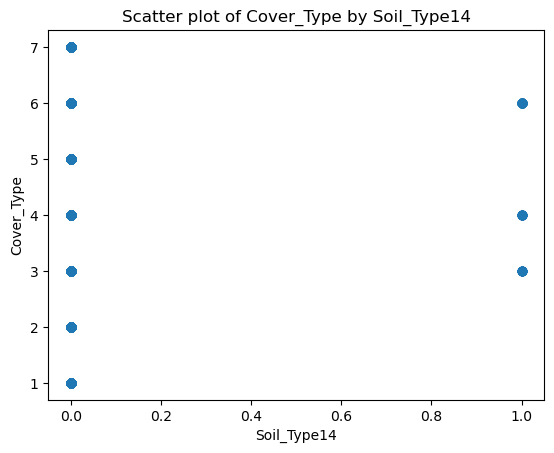

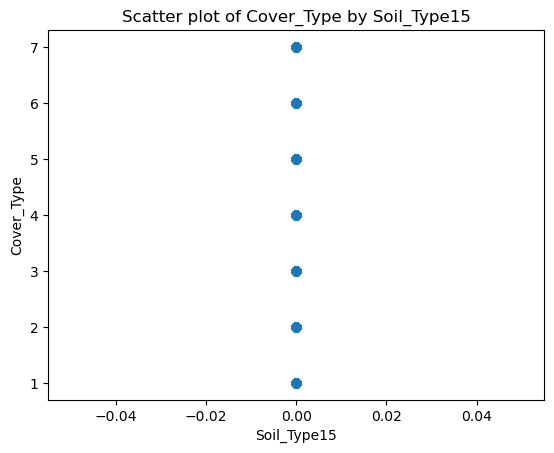

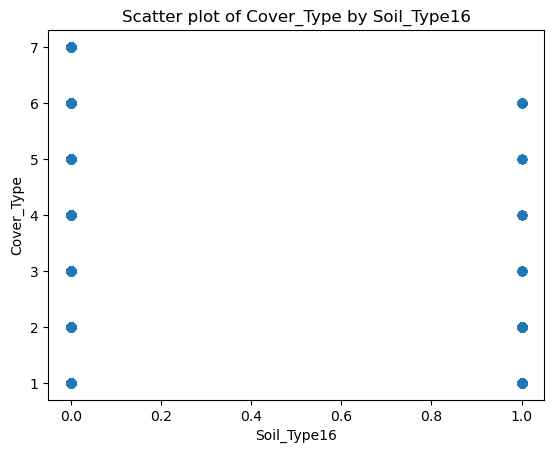

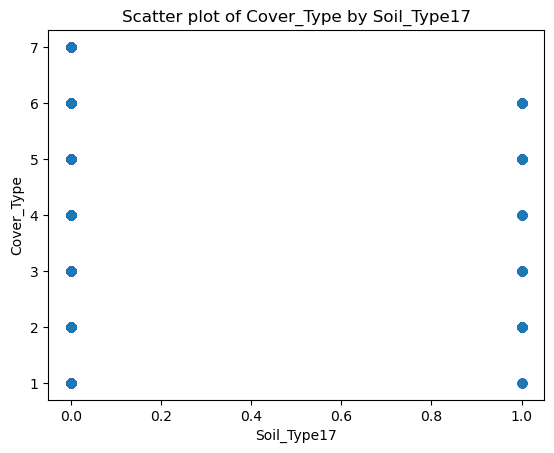

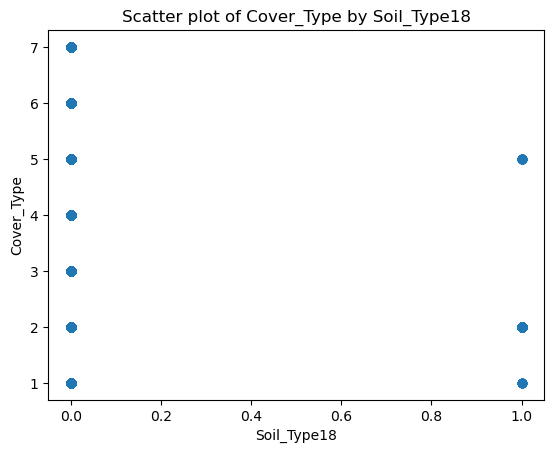

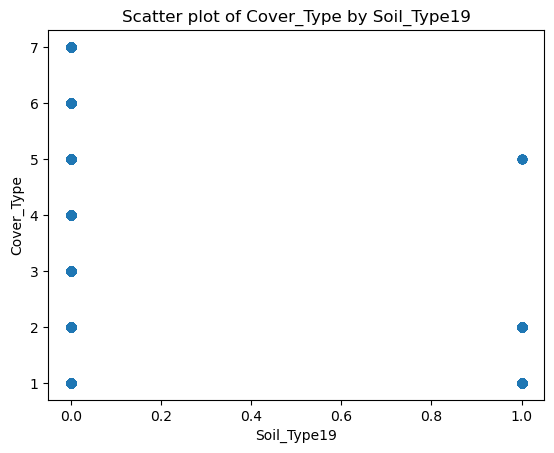

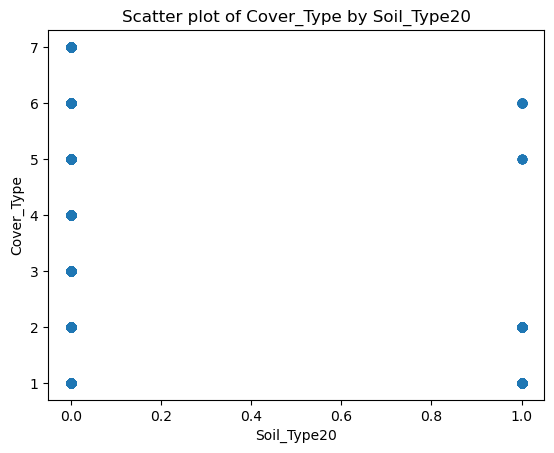

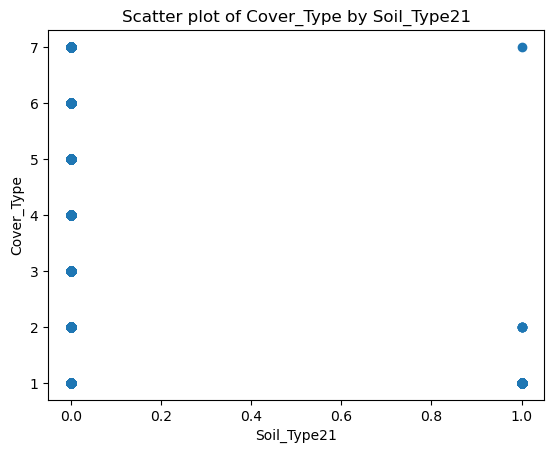

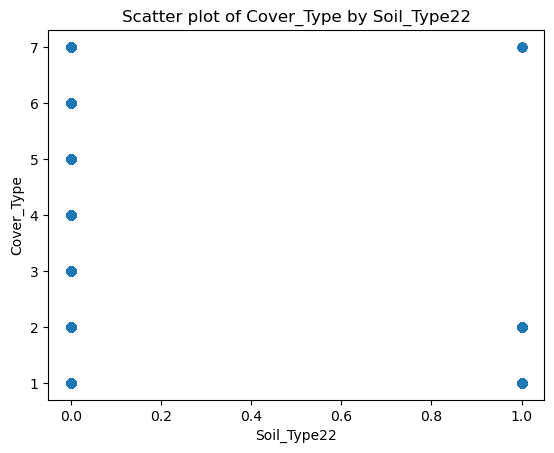

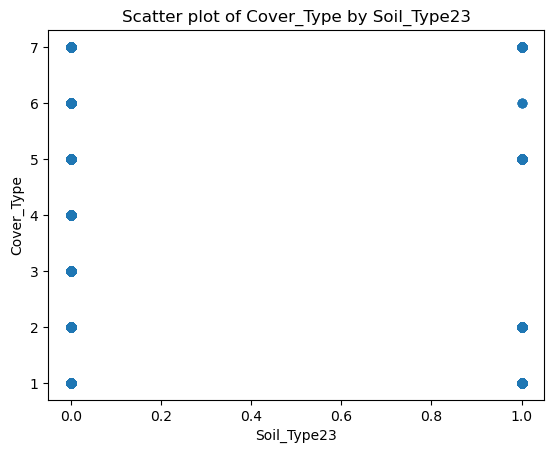

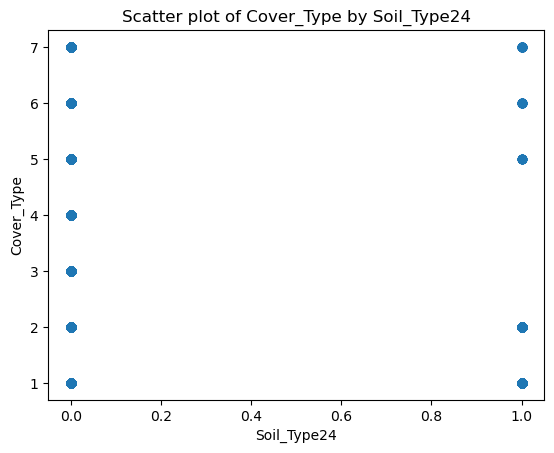

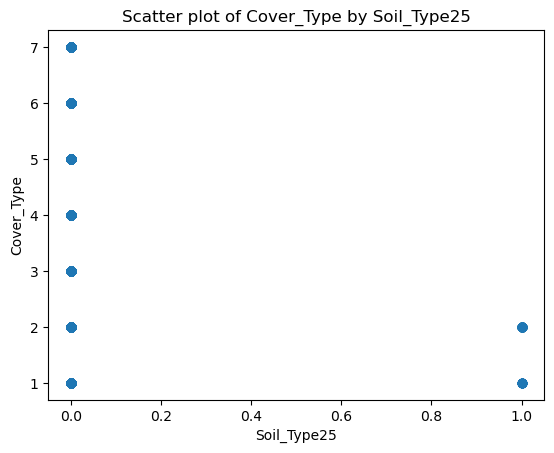

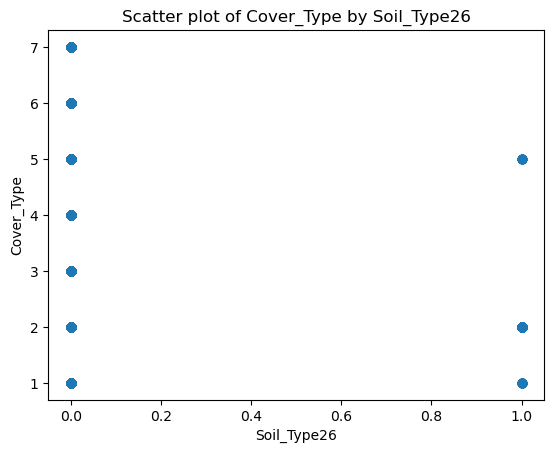

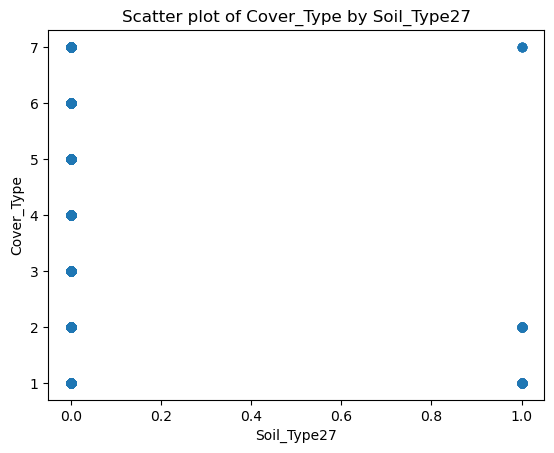

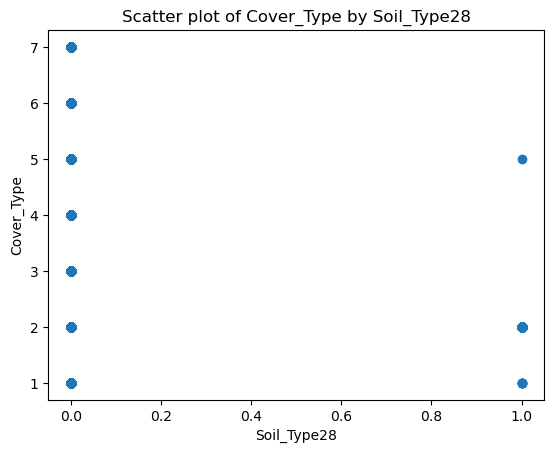

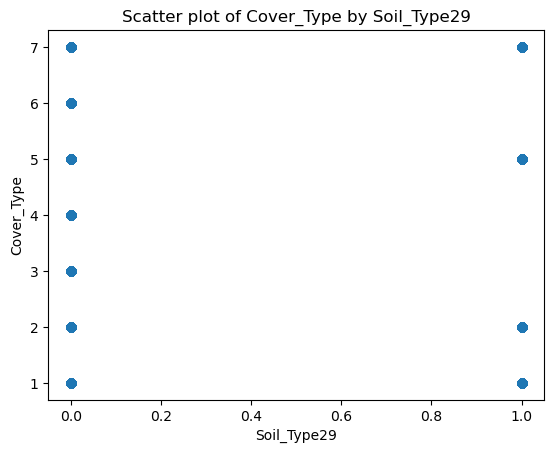

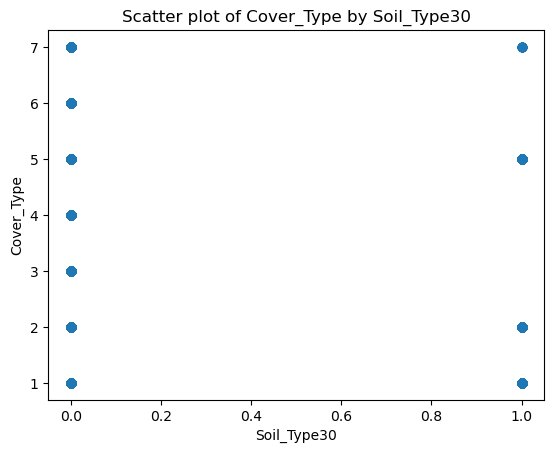

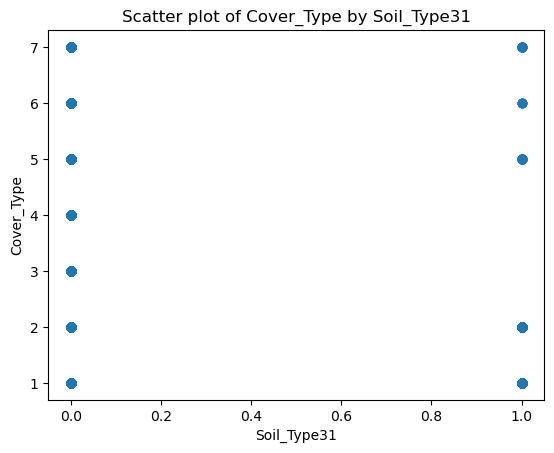

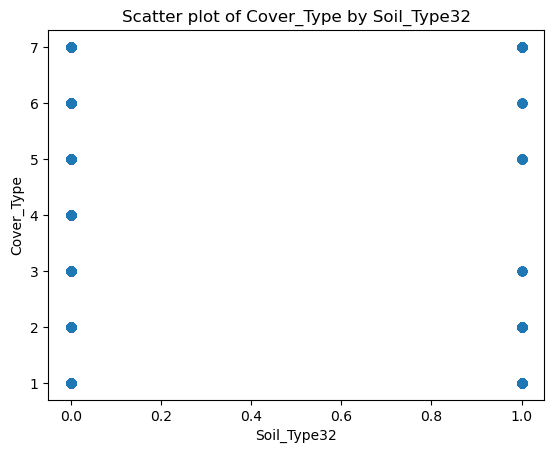

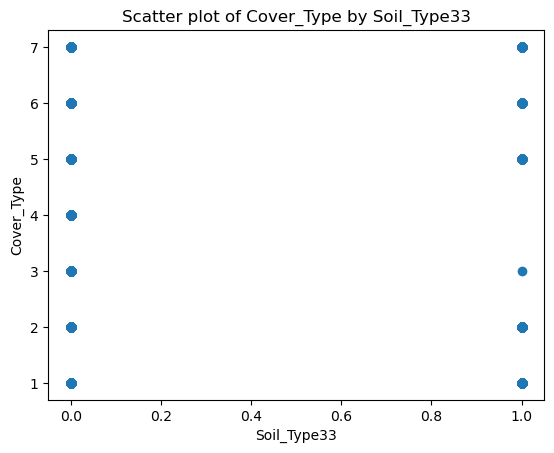

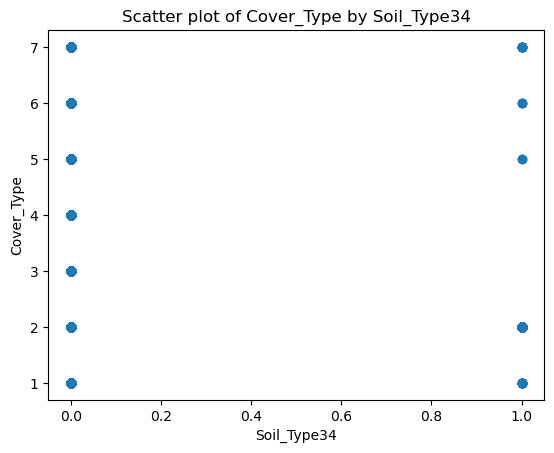

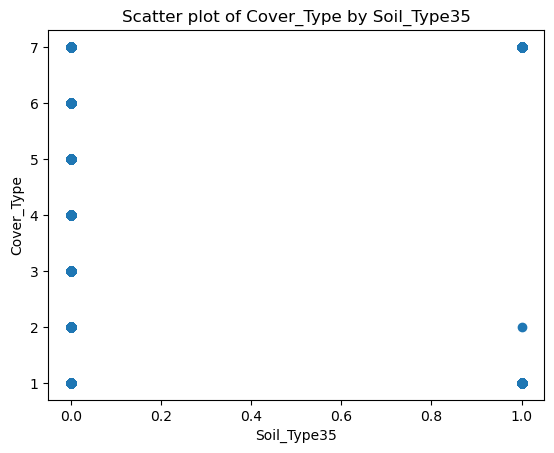

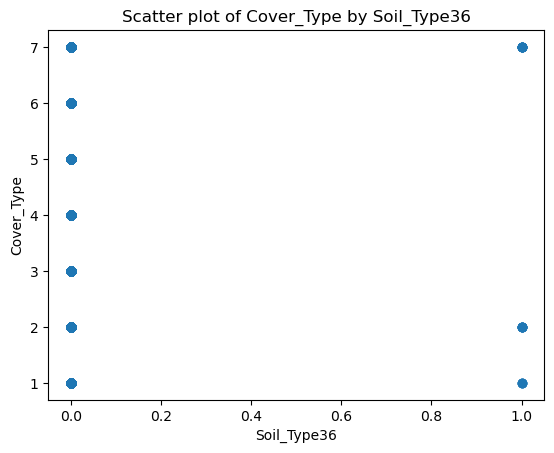

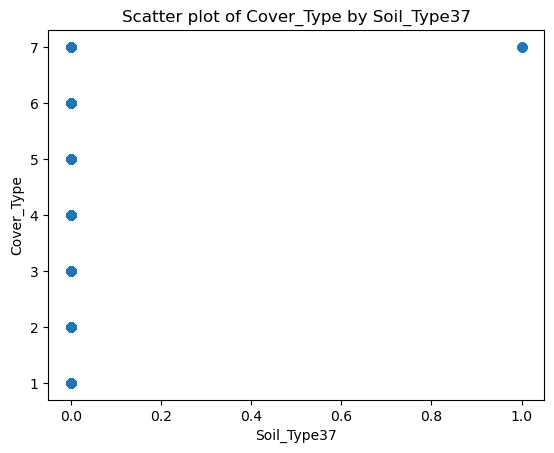

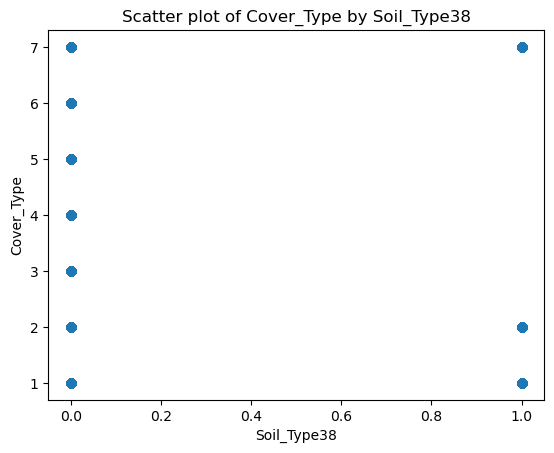

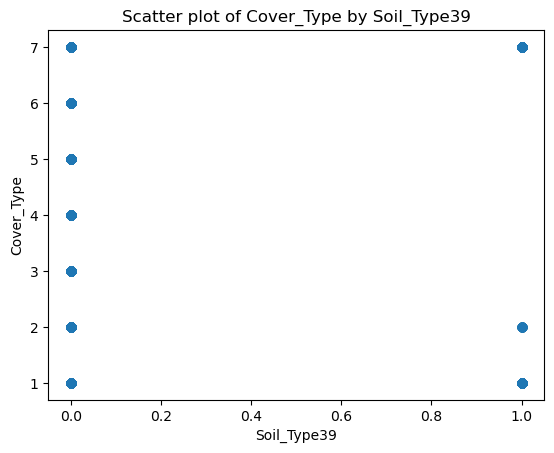

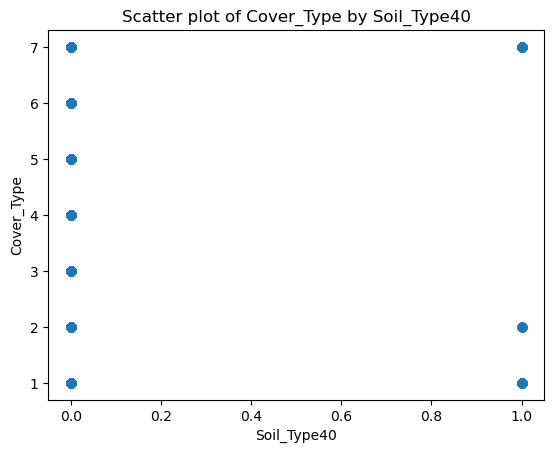

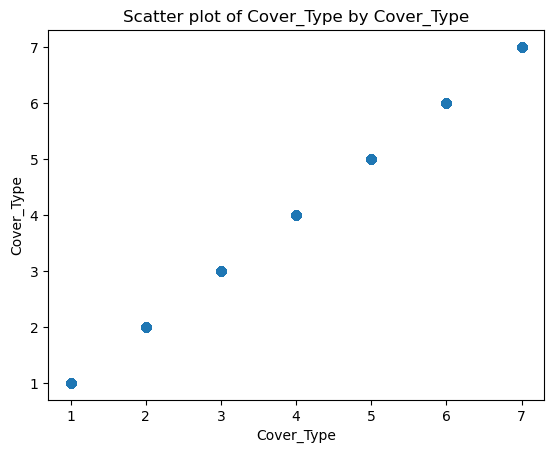

In [111]:
for feature in dfTrain.columns:
    plt.scatter(dfTrain[feature], dfTrain['Cover_Type'])
    plt.ylabel('Cover_Type')
    plt.xlabel(f'{feature}')
    plt.title(f"Scatter plot of Cover_Type by {feature}")
    plt.show()

## Building Model


### Model implementation


In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
classifier = RandomForestClassifier()

### Model Training/Fitting


In [114]:
features = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

X_train = dfTrain[features]
X_test = dfTest[features]

In [115]:
y_train = dfTrain['Cover_Type']

In [116]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

## Making predictions


### Predicting on test_set


In [117]:
predictions = classifier.predict(X_test)

### Saving prediction file


In [118]:
dfSubmission['Cover_Type'] = predictions

In [119]:
dfSubmission.head()

,row_ID,Cover_Type
0,0,2
1,1,2
2,2,3
3,3,2
4,4,3


In [120]:
dfSubmission.to_csv(os.path.join(DATA_FOLDER, SUBMISSION_FILE_NAME), index=False)